In [1]:
pip install matplotlib pillow


Note: you may need to restart the kernel to use updated packages.


In [2]:
import json
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image


In [3]:

# Load the JSON files
with open('/home/magali/CV4Ecology-summer-school/FinalDataset/SubsetSexModelRoeDeerCocoVal_croppedID.json', 'r') as f:
    cropped_data = json.load(f)

with open('/home/magali/ct_classifier/inspect_json/model_sex/ModelOutput_BestModelRoeDeer.json', 'r') as f:
    model_output = json.load(f)

In [4]:
# Softmax function
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)


In [30]:
# Select a random cropped image data
random_crop_data = random.choice(cropped_data["images"])
cropped_image_path = random_crop_data['file_name']
original_image_path = random_crop_data['original_file_name']

# Fetch the corresponding prediction
index_of_prediction = model_output["filepaths"].index(cropped_image_path)
predicted_label_idx = model_output["pred_labels"][index_of_prediction]

# Map the predicted label index to string label
label_map = {0: "female", 1: "male"}  # Adjust this if there are more categories
predicted_label = label_map[predicted_label_idx]

# Fetch corresponding logits and compute softmax values
logits_for_image = model_output["logits"][index_of_prediction]
softmax_values = softmax(np.array(logits_for_image))

# Fetch softmax value corresponding to the predicted label
predicted_softmax_value = softmax_values[predicted_label_idx]

# Fetch bounding box
bbox = next(item for item in cropped_data["annotations"] if item["image_id"] == random_crop_data["id"])["bbox"]
x, y, w, h = bbox

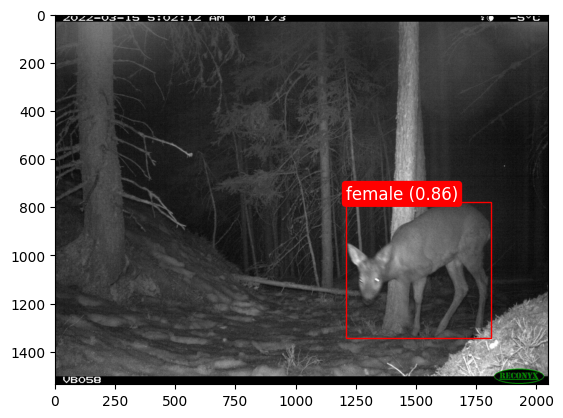

In [31]:
# Display the image with bounding box
im = Image.open(original_image_path)
fig, ax = plt.subplots(1)
ax.imshow(im)

rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

# Add label and score at top-left corner of the bounding box
label_with_score = f"{predicted_label} ({predicted_softmax_value:.2f})"
ax.text(x, y - 15, label_with_score, color="white", bbox=dict(facecolor='red', edgecolor='red', boxstyle='round,pad=0.2'), fontsize=12)

plt.show()


#### TRY OUT

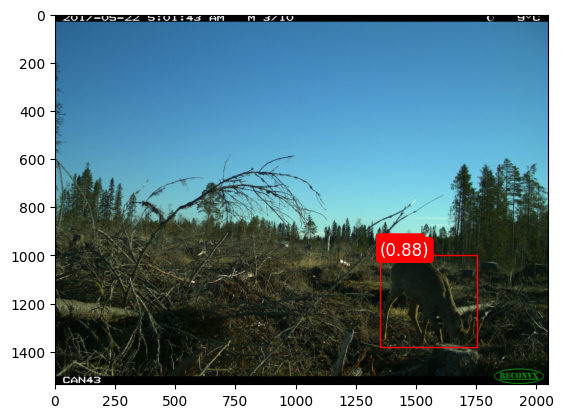

In [77]:
# Display the image with bounding box
im = Image.open(original_image_path)
fig, ax = plt.subplots(1)
ax.imshow(im)

rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

# Add label at top-left corner of the bounding box
label_style = dict(facecolor='red', edgecolor='red', boxstyle='round,pad=0.2')
ax.text(x, y - 15, predicted_label, color="white", bbox=label_style, fontsize=12)
score_text = f"({predicted_softmax_value:.2f})"
ax.text(x, y, score_text, color="white", bbox=label_style, fontsize=12)

plt.show()

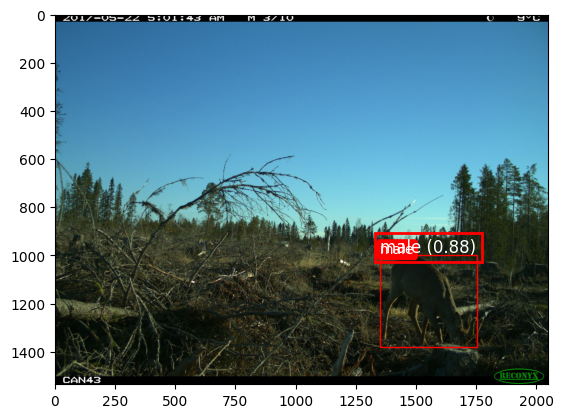

In [76]:
im = Image.open(original_image_path)
fig, ax = plt.subplots(1)
ax.imshow(im)

rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

# Add label at top-left corner of the bounding box
ax.text(bbox[0], bbox[1] - 5, predicted_label, color="white", bbox=dict(facecolor='red', edgecolor='red', boxstyle='round,pad=0.2'))
label_text = f"{predicted_label} ({predicted_softmax_value:.2f})"
plt.text(x, y - 10, label_text, bbox=dict(fill=False, edgecolor='red', linewidth=2), color='white', fontsize=12)

plt.show()

In [ ]:
# Plot
im = Image.open(random_image_data['original_file_name'])
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(im)

bbox = annotation_for_image['bbox']
rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

# Add label at top-left corner of the bounding box
ax.text(bbox[0], bbox[1] - 5, predicted_label, color="white", bbox=dict(facecolor='red', edgecolor='red', boxstyle='round,pad=0.2'))

plt.show()

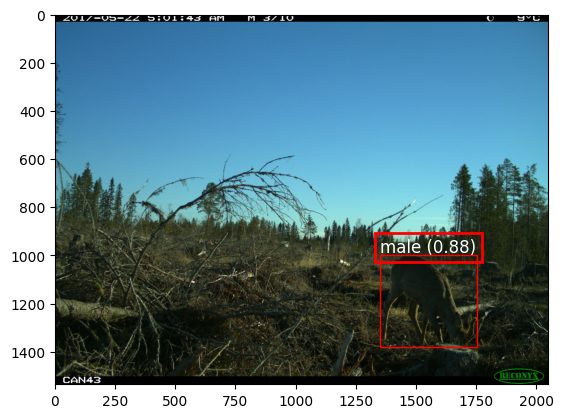

In [69]:
# Display the image with bounding box and predicted label
im = Image.open(original_image_path)
fig, ax = plt.subplots(1)
ax.imshow(im)

rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

label_text = f"{predicted_label} ({predicted_softmax_value:.2f})"
plt.text(x, y - 10, label_text, bbox=dict(fill=False, edgecolor='red', linewidth=2), color='white', fontsize=12)
plt.show()

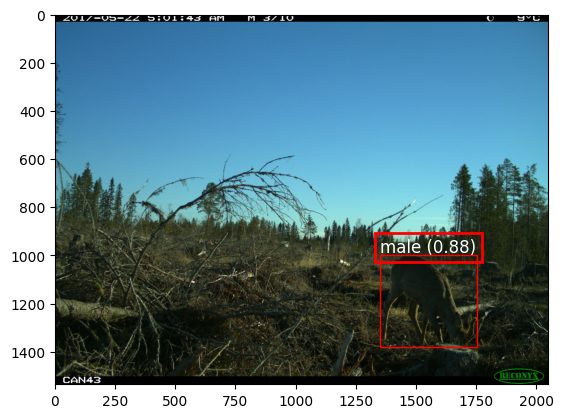

In [68]:
# Display the image with bounding box and predicted label
im = Image.open(original_image_path)
fig, ax = plt.subplots(1)
ax.imshow(im)

rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

label_text = f"{predicted_label} ({predicted_softmax_value:.2f})"
plt.text(x, y - 10, label_text, bbox=dict(fill=False, edgecolor='red', linewidth=2), color='white', fontsize=12)
plt.show()


im = Image.open(original_image_path)
fig, ax = plt.subplots(1)
ax.imshow(im)

rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

label_text = f"{predicted_label} ({predicted_softmax_value:.2f})"
plt.text(x, y - 10, label_text, bbox=dict(fill=True, color='red'), color='white', fontsize=12)
plt.show()


# Display the image with bounding box and predicted label
im = Image.open(original_image_path)
fig, ax = plt.subplots(1)
ax.imshow(im)

rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

label_text = f"{predicted_label} ({predicted_softmax_value:.2f})"
plt.text(x, y - 10, label_text, bbox=dict(fill=True, color='red'), color='white', fontsize=12)
plt.show()

In [30]:

# Create a mapping between cropped_path and prediction
prediction_map = dict(zip(prediction_data['filepaths'], prediction_data['pred_labels']))


In [31]:
#transform logits

def softmax(logits):
    e_logits = np.exp(logits - np.max(logits))
    return e_logits / e_logits.sum(axis=-1, keepdims=True)

In [32]:
# Select a random image from the 'images' key in the COCO format
random_image_data = random.choice(cropped_data['images'])
cropped_image_path = random_image_data['file_name']

# Get annotation for the selected image (assuming there's an "annotations" key)
annotation_for_image = [anno for anno in cropped_data.get('annotations', []) if anno['image_id'] == random_image_data['id']][0]

# Get category name
category_name = [cat['name'] for cat in cropped_data['categories'] if cat['id'] == annotation_for_image['category_id']][0]

In [11]:
# Get prediction using the cropped image path
#pred_index = prediction_data['filepaths'].index(cropped_image_path)
#predicted_label = "male" if prediction_data['pred_labels'][pred_index] == 0 else "female"


In [33]:
# Find the index of the prediction corresponding to the random image
index_of_prediction = prediction_data["filepaths"].index(random_image_data['file_name'])

# Get the predicted label index (0 or 1)
predicted_label_idx = "male" if prediction_data["pred_labels"][index_of_prediction]  == 0 else "female"


In [35]:
# Fetch corresponding logits and compute softmax values
logits_for_image = prediction_data["logits"][index_of_prediction]
softmax_values = softmax(np.array(logits_for_image))

In [ ]:
# Convert predicted_label from string to corresponding index
label_to_index = {"female": 0, "male": 1}  # this dictionary can be expanded if there are more categories
predicted_label_idx = label_to_index[pred_label]

# Fetch corresponding logits and compute softmax values
logits_for_image = model_output["logits"][index_of_prediction]
softmax_values = softmax(np.array(logits_for_image))

# Fetch softmax value corresponding to the predicted label
predicted_softmax_value = softmax_values[predicted_label_idx]


In [36]:
# Print for debugging
print(f"Predicted Label Index: {predicted_label_idx} | Type: {type(predicted_label_idx)}")
print(f"Softmax Values: {softmax_values} | Shape: {softmax_values.shape}")

Predicted Label Index: female | Type: <class 'str'>
Softmax Values: [0.12976434 0.87023566] | Shape: (2,)


In [34]:


# Fetch softmax value corresponding to the predicted label
predicted_softmax_value = softmax_values[predicted_label_idx]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# Fetch corresponding logits and compute softmax values
#logits_for_image = prediction_data["logits"][index_of_prediction]
#softmax_values = softmax(np.array(logits_for_image))

# Fetch softmax value corresponding to the predicted label
#predicted_softmax_value = softmax_values[predicted_label_idx]

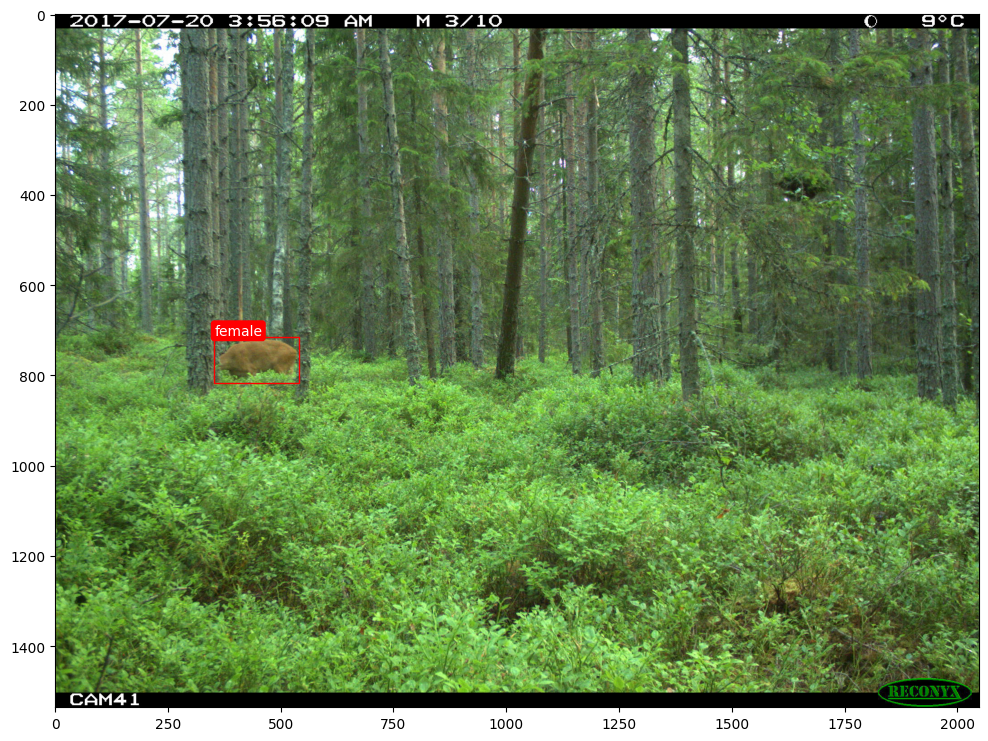

In [23]:
# Plot
im = Image.open(random_image_data['original_file_name'])
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(im)

bbox = annotation_for_image['bbox']
rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

# Add label at top-left corner of the bounding box
ax.text(bbox[0], bbox[1] - 5, predicted_label, color="white", bbox=dict(facecolor='red', edgecolor='red', boxstyle='round,pad=0.2'))

plt.show()







